# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve,precision_score,accuracy_score,roc_curve,classification_report,confusion_matrix,precision_recall_curve,auc,f1_score

First, we will load the data and delete the unnecessary columns.

In [2]:
userbookrating=pd.read_csv('data/book_recommendation.csv')

In [3]:
userbookrating.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [4]:
userbookrating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,22.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,23.0
2,276729,052165615X,3,Help!: Level 1,Philip Prowse,16.0
3,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,16.0
4,276744,038550120X,7,A Painted House,JOHN GRISHAM,18.0


We will relabel the ISBN into Book-ID as numerical since it's easier to work with numerical variable than string variable.

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [6]:
userbookrating['Book-ID'] = label_encoder.fit_transform(userbookrating['ISBN'])
userbookrating.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Age,Book-ID
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,22.0,41502
1,276726,0155061224,5,Rites of Passage,Judith Rae,23.0,20451
2,276729,052165615X,3,Help!: Level 1,Philip Prowse,16.0,100709
3,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,16.0,100742
4,276744,038550120X,7,A Painted House,JOHN GRISHAM,18.0,64871


As shown from the histogram of "Book-Rating" below, there are not many books that are rate in range 1-4. In addition, there are way too much 0 ratings. Thus, we will redefine a new rating system in which books that are rated 0-6 will be labeled as 1 while the remaining books will be labeled 2. With this, books that are liked will have 2 ratings while books that are disliked will have 1 ratings.

<AxesSubplot:xlabel='Book-Rating', ylabel='Count'>

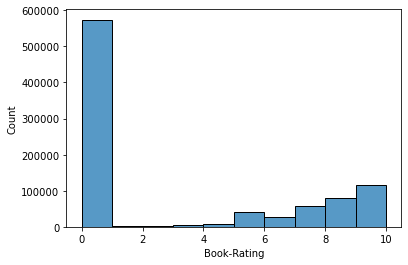

In [7]:
sns.histplot(userbookrating['Book-Rating'], binwidth=1)

In [8]:
userbookrating['recommeded_book']=1

In [9]:
userbookrating.loc[userbookrating['Book-Rating']>6,'recommeded_book']=2

In [10]:
userbookrating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Age,Book-ID,recommeded_book
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,22.0,41502,1
1,276726,0155061224,5,Rites of Passage,Judith Rae,23.0,20451,1
2,276729,052165615X,3,Help!: Level 1,Philip Prowse,16.0,100709,1
3,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,16.0,100742,1
4,276744,038550120X,7,A Painted House,JOHN GRISHAM,18.0,64871,2


Next, we will remove books that only have 1 ratings. These books are too rare to give insightful information for our recommendation system.

In [11]:
countbook=pd.DataFrame({'Book-Title':userbookrating['Book-Title'].value_counts().index, 'occurence':userbookrating['Book-Title'].value_counts().values})
booktodrop=countbook[countbook['occurence']<2]['Book-Title'].to_list()
userbookrating=userbookrating[~userbookrating['Book-Title'].isin(booktodrop)]

Similarly, we will aso remove users with less then 10 ratings.

In [12]:
userbookrating['User-ID']

0         276725
1         276726
4         276744
5         276746
6         276746
           ...  
912425    276704
912426    276704
912427    276706
912428    276709
912429    276721
Name: User-ID, Length: 781464, dtype: int64

In [13]:
userbookrating['User-ID'].value_counts()

11676     9780
153662    4462
35859     4451
198711    4324
98391     3812
          ... 
171345       1
148810       1
146757       1
206763       1
193886       1
Name: User-ID, Length: 79856, dtype: int64

In [14]:
countuser=pd.DataFrame({'User-ID':userbookrating['User-ID'].value_counts().index, 'occurence':userbookrating['User-ID'].value_counts().values})

In [15]:
countuser.head()

,User-ID,occurence
0,11676,9780
1,153662,4462
2,35859,4451
3,198711,4324
4,98391,3812


In [16]:
userbookrating.shape

(781464, 8)

In [17]:
usertodrop=countuser[countuser['occurence']<11]['User-ID'].to_list()

In [18]:
userbookrating=userbookrating[~userbookrating['User-ID'].isin(usertodrop)]

In [19]:
userbookrating.shape

(632661, 8)

In [20]:
userbookrating['User-ID'].value_counts()

11676     9780
153662    4462
35859     4451
198711    4324
98391     3812
          ... 
62592       11
143302      11
77499       11
169677      11
71081       11
Name: User-ID, Length: 8678, dtype: int64

In [21]:
userbookrating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632661 entries, 21 to 912426
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   User-ID          632661 non-null  int64  
 1   ISBN             632661 non-null  object 
 2   Book-Rating      632661 non-null  int64  
 3   Book-Title       632661 non-null  object 
 4   Book-Author      632661 non-null  object 
 5   Age              632661 non-null  float64
 6   Book-ID          632661 non-null  int32  
 7   recommeded_book  632661 non-null  int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 41.0+ MB


In [22]:
userbookrating.reset_index(drop=True,inplace=True)

Now we will split the data into training set and test set.

In [23]:
#Import the train_test_split function
from sklearn.model_selection import train_test_split

#Assign X as the original ratings dataframe and y as the user_id column of ratings.
X = userbookrating[['User-ID','Book-ID']]
y = userbookrating['recommeded_book']

#Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=423)

In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: recommeded_book, dtype: int64

In [25]:
X.head()

,User-ID,Book-ID
0,276762,41237
1,276762,58954
2,276762,89546
3,276762,92058
4,276762,173275


# Modeling

First, we need to create a scoring function to evaluate the model. We will use root mean square as our metric. 

In [26]:
#Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

#Function that computes the root mean squared error (or RMSE)
def rootmeansquare(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [27]:
def model_evaluation(actual_values, predicted_values, predicted_probabilities):
    cfn_mat = confusion_matrix(actual_values,predicted_values,labels=[1, 2])
    print("confusion matrix: \n",cfn_mat)
    print("\naccuracy: ",accuracy_score(actual_values,predicted_values))
    print("\nclassification report: \n", classification_report(actual_values,predicted_values))
    # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(3):
#         fpr[i], tpr[i], _ = roc_curve(actual_values[:, i], predicted_values[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
#     fpr["micro"], tpr["micro"], _ = roc_curve(actual_values.ravel(), predicted_values.ravel())
#     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    fpr,tpr,threshold=roc_curve(actual_values, predicted_probabilities,pos_label=2)
    print ('\nArea under ROC curve for validation set:', auc(fpr,tpr))
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(fpr,tpr,label='Validation set AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.legend(loc='best')
    plt.show()
    return auc(fpr,tpr),accuracy_score(actual_values,predicted_values),precision_score(actual_values,predicted_values, pos_label=2)

Next, we will test our model with a baseline model in which we use stratification to classify recommended book.

In [28]:
recommendedbookratio=len(y[y==2])/len(y)

In [29]:
recommendedbookratio

0.24190206129348893

In [30]:
#Define the baseline model to always return 3.
def stratifymodel(user, book):
    if random.random()>recommendedbookratio:
        return 1
    else:
        return 2

In [31]:
y_pred=[stratifymodel(user, book) for (user,book) in zip(X_test['User-ID'], X_test['Book-ID'])]
y_prob=[recommendedbookratio for i in range(len(y_test))]

confusion matrix: 
 [[109033  34853]
 [ 34794  11119]]

accuracy:  0.6330486461994004

classification report: 
               precision    recall  f1-score   support

           1       0.76      0.76      0.76    143886
           2       0.24      0.24      0.24     45913

    accuracy                           0.63    189799
   macro avg       0.50      0.50      0.50    189799
weighted avg       0.63      0.63      0.63    189799


Area under ROC curve for validation set: 0.5


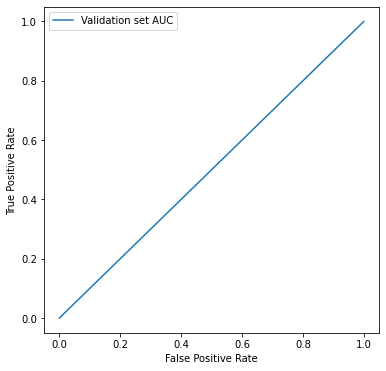

In [32]:
aucdummy, accdummmy,predummy=model_evaluation(y_test,y_pred,y_prob)

### Collaborative Filtering

Next, we will build a model using collaborative filtering. Bur first, we need to build a rating matrix with the rows indicate the users, the columns imply the books, and the values are the ratings.

In [33]:
table=X_train.copy()
table['recommeded_book']=y_train
rating_matrix = table.pivot_table(values='recommeded_book', index='User-ID', columns='Book-ID')

rating_matrix.head()

Book-ID,1,2,7,10,13,22,23,28,34,36,...,248779,248782,248784,248786,248788,248791,248797,248799,248801,248808
User-ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
def classify(number,rate):
    if number > rate:
        return 2
    else:
        return 1

In [35]:
def propa(number):
    if number > 2:
        return 1
    elif number <1:
        return 0
    else:
        return number - 1

The first model we build will be based on simple mean.

In [36]:
#User Based Collaborative Filter using Mean Ratings
def meanrating(user, book,rating_matrix):
    if book in rating_matrix:
        mean_rating = rating_matrix[book].mean()
    else:
        mean_rating = stratifymodel(user, book)
    
    return propa(mean_rating)

In [37]:
y_prob=[meanrating(user, book,rating_matrix) for (user,book) in zip(X_test['User-ID'], X_test['Book-ID'])]
y_pred=[classify(i,0.5) for i in y_prob]

confusion matrix: 
 [[132259  11627]
 [ 40492   5421]]

accuracy:  0.7253989747048193

classification report: 
               precision    recall  f1-score   support

           1       0.77      0.92      0.84    143886
           2       0.32      0.12      0.17     45913

    accuracy                           0.73    189799
   macro avg       0.54      0.52      0.50    189799
weighted avg       0.66      0.73      0.67    189799


Area under ROC curve for validation set: 0.5669695829141345


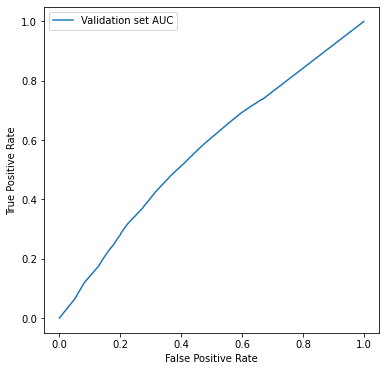

In [38]:
aucmean, accmean,premean=model_evaluation(y_test,y_pred,y_prob)

Now, we will now apply a user-based collaborative filtering.  

In [39]:
rating_matrix_dummy = rating_matrix.copy().fillna(0)

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(rating_matrix_dummy, rating_matrix_dummy)

In [41]:
cosine_sim = pd.DataFrame(cosine_sim, index=rating_matrix.index, columns=rating_matrix.index)
cosine_sim.head(5)

User-ID,8,242,243,254,383,388,408,424,446,487,...,278356,278390,278418,278535,278563,278582,278633,278637,278843,278851
User-ID,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
242,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.028172,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
243,0.0,0.0,1.000000,0.015876,0.000000,0.0,0.0,0.000000,0.047538,0.000000,...,0.000000,0.000000,0.017165,0.062541,0.0,0.0,0.025909,0.0,0.035109,0.0
254,0.0,0.0,0.015876,1.000000,0.024891,0.0,0.0,0.055951,0.000000,0.000000,...,0.040647,0.009891,0.008039,0.000000,0.0,0.0,0.000000,0.0,0.016443,0.0
383,0.0,0.0,0.000000,0.024891,1.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


In [42]:
#User Based Collaborative Filter using Weighted Mean Ratings
def wmeanrating(user, book,rating_matrix,cosine_sim):
    
    #Check if book exists in r_matrix
    if book in rating_matrix:
        
        #Get the similarity scores for the user in question with every other user
        sim_scores = cosine_sim[user]
        
        #Get the user ratings for the book in question
        m_ratings = rating_matrix[book]
        
        #Extract the indices containing NaN in the m_ratings series
        idx = m_ratings[m_ratings.isnull()].index
        
        #Drop the NaN values from the m_ratings Series
        m_ratings = m_ratings.dropna()
        
        #Drop the corresponding cosine scores from the sim_scores series
        sim_scores = sim_scores.drop(idx)
        
        #Compute the final weighted mean
#         if sim_scores.sum() > 0.001:
        if np.dot(sim_scores, m_ratings) < 3*sim_scores.sum():
            wmean_rating = propa(np.dot(sim_scores, m_ratings)/ sim_scores.sum())
        else:
            wmean_rating = propa(meanrating(user, book,rating_matrix))
    
    else:
        #Default to a rating of 3.0 in the absence of any information
        wmean_rating = recommendedbookratio
    
    return wmean_rating

In [43]:
y_prob=[wmeanrating(user, book,rating_matrix,cosine_sim) for (user,book) in zip(X_test['User-ID'], X_test['Book-ID'])]
y_pred=[classify(i,0.5) for i in y_prob]

confusion matrix: 
 [[130351  13535]
 [ 39157   6756]]

accuracy:  0.7223799914646547

classification report: 
               precision    recall  f1-score   support

           1       0.77      0.91      0.83    143886
           2       0.33      0.15      0.20     45913

    accuracy                           0.72    189799
   macro avg       0.55      0.53      0.52    189799
weighted avg       0.66      0.72      0.68    189799


Area under ROC curve for validation set: 0.5573107475388386


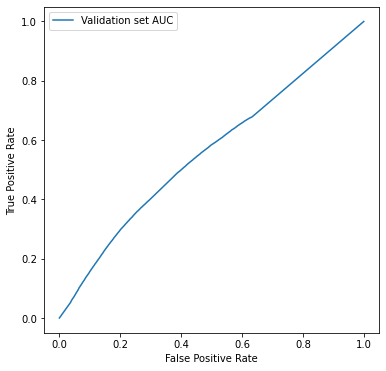

In [44]:
aucwmean, accwmean,prewmean=model_evaluation(y_test,y_pred,y_prob)

### Modeling Using The Surprise Scykit 

First, we need to import the necessary modules and prepare the data.

In [45]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader

reader = Reader()
data = Dataset.load_from_df(userbookrating[['User-ID','Book-ID','recommeded_book']], reader)
model_train, model_test = train_test_split(data, test_size=.3)

The first model is K-NN.

In [46]:
from surprise import KNNBasic
knn = KNNBasic()
knn.fit(model_train)
predictions = knn.test(model_test)
knnscore=accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4615


In [47]:
y_test=[predictions[i].r_ui for i in range(len(predictions))]
y_prob=[propa(predictions[i].est) for i in range(len(predictions))]
y_pred=[classify(i,0.5) for i in y_prob]

confusion matrix: 
 [[133977  10419]
 [ 39997   5406]]

accuracy:  0.7343716247187815

classification report: 
               precision    recall  f1-score   support

         1.0       0.77      0.93      0.84    144396
         2.0       0.34      0.12      0.18     45403

    accuracy                           0.73    189799
   macro avg       0.56      0.52      0.51    189799
weighted avg       0.67      0.73      0.68    189799


Area under ROC curve for validation set: 0.5810946689711678


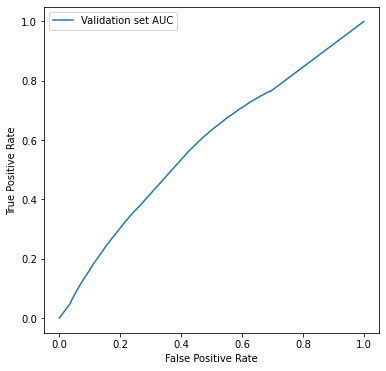

In [48]:
aucknn, accknn,preknn=model_evaluation(y_test,y_pred,y_prob)

Next is K-NN Baseline

In [49]:
from surprise import KNNBaseline
knnbaseline = KNNBaseline()
knnbaseline.fit(model_train)
predictions = knnbaseline.test(model_test)
knnbaselinescore=accuracy.rmse(predictions)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4162


In [50]:
y_test=[predictions[i].r_ui for i in range(len(predictions))]
y_prob=[propa(predictions[i].est) for i in range(len(predictions))]
y_pred=[classify(i,0.5) for i in y_prob]

confusion matrix: 
 [[131886  12510]
 [ 32733  12670]]

accuracy:  0.7616267735867944

classification report: 
               precision    recall  f1-score   support

         1.0       0.80      0.91      0.85    144396
         2.0       0.50      0.28      0.36     45403

    accuracy                           0.76    189799
   macro avg       0.65      0.60      0.61    189799
weighted avg       0.73      0.76      0.74    189799


Area under ROC curve for validation set: 0.7261848071950052


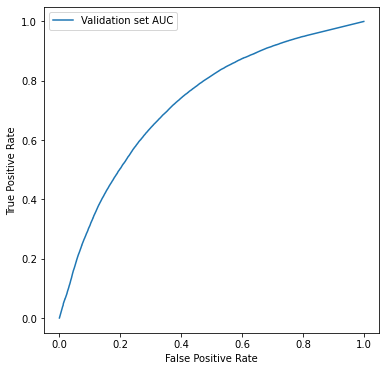

In [51]:
aucknnbaseline, accknnbaseline,preknnbaseline=model_evaluation(y_test,y_pred,y_prob)

Next is SVD.

In [52]:
from surprise import SVD
svdmodel = SVD()
svdmodel.fit(model_train)
predictions = svdmodel.test(model_test)
svdscore=accuracy.rmse(predictions)

RMSE: 0.3893


In [53]:
y_test=[predictions[i].r_ui for i in range(len(predictions))]
y_prob=[propa(predictions[i].est) for i in range(len(predictions))]
y_pred=[classify(i,0.5) for i in y_prob]

confusion matrix: 
 [[136054   8342]
 [ 32570  12833]]

accuracy:  0.7844456503985795

classification report: 
               precision    recall  f1-score   support

         1.0       0.81      0.94      0.87    144396
         2.0       0.61      0.28      0.39     45403

    accuracy                           0.78    189799
   macro avg       0.71      0.61      0.63    189799
weighted avg       0.76      0.78      0.75    189799


Area under ROC curve for validation set: 0.7600105000760106


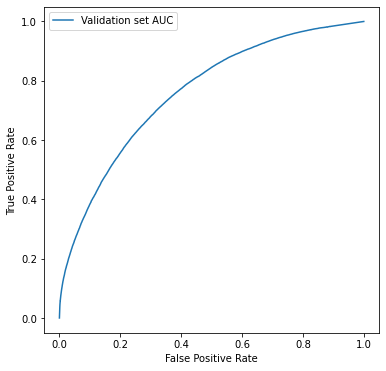

In [54]:
aucsvd, accsvd,presvd=model_evaluation(y_test,y_pred,y_prob)

Next is NMF.

In [55]:
from surprise import NMF
nmfmodel = NMF()
nmfmodel.fit(model_train)
predictions = nmfmodel.test(model_test)
nmfscore=accuracy.rmse(predictions)

RMSE: 0.4163


In [56]:
y_test=[predictions[i].r_ui for i in range(len(predictions))]
y_prob=[propa(predictions[i].est) for i in range(len(predictions))]
y_pred=[classify(i,0.5) for i in y_prob]

confusion matrix: 
 [[137450   6946]
 [ 36240   9163]]

accuracy:  0.7724645546077693

classification report: 
               precision    recall  f1-score   support

         1.0       0.79      0.95      0.86    144396
         2.0       0.57      0.20      0.30     45403

    accuracy                           0.77    189799
   macro avg       0.68      0.58      0.58    189799
weighted avg       0.74      0.77      0.73    189799


Area under ROC curve for validation set: 0.6951257374745201


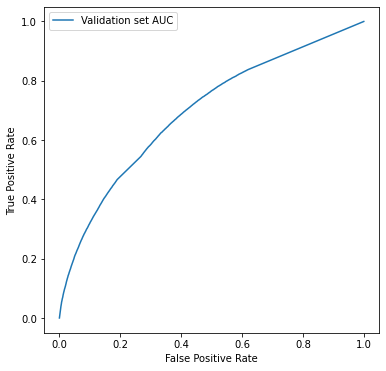

In [57]:
aucnmf, accnmf,prenmf=model_evaluation(y_test,y_pred,y_prob)

Next is Co-Clustering.

In [58]:
from surprise import CoClustering
coclustermodel = CoClustering()
coclustermodel.fit(model_train)
predictions = coclustermodel.test(model_test)
coclusterscore=accuracy.rmse(predictions)

RMSE: 0.4305


In [59]:
y_test=[predictions[i].r_ui for i in range(len(predictions))]
y_prob=[propa(predictions[i].est) for i in range(len(predictions))]
y_pred=[classify(i,0.5) for i in y_prob]

confusion matrix: 
 [[127521  16875]
 [ 29668  15735]]

accuracy:  0.7547774224310981

classification report: 
               precision    recall  f1-score   support

         1.0       0.81      0.88      0.85    144396
         2.0       0.48      0.35      0.40     45403

    accuracy                           0.75    189799
   macro avg       0.65      0.61      0.62    189799
weighted avg       0.73      0.75      0.74    189799


Area under ROC curve for validation set: 0.7153459653860513


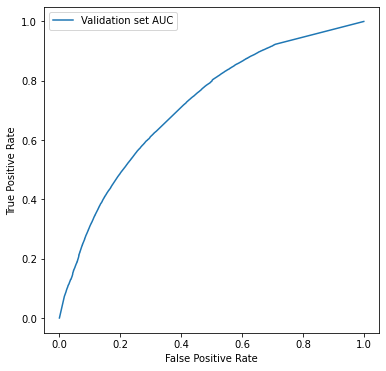

In [60]:
auccocluster, acccocluster,precocluster=model_evaluation(y_test,y_pred,y_prob)

Now we will compare all the models we have.

In [61]:
modelLabels = [ 'Dummy Classification', 'Mean','Weighted Mean','k-NN', 'k-NN Baseline','SVD','NMF','Co-Clustering']
score_auc= [aucdummy,aucmean,aucwmean,aucknn,aucknnbaseline,aucsvd,aucnmf,auccocluster]
score_acc= [accdummmy,accmean,accwmean,accknn,accknnbaseline,accsvd,accnmf,acccocluster]
score_pre= [predummy,premean,prewmean,preknn,preknnbaseline,presvd,prenmf,precocluster]
score_tab = pd.DataFrame(list(zip(modelLabels, score_auc, score_acc,score_pre)), 
               columns =['Algorithm', 'AUC','Accucracy', 'Precision' ]) 

score_tab

,Algorithm,AUC,Accucracy,Precision
0,Dummy Classification,0.500000,0.633049,0.241865
1,Mean,0.566970,0.725399,0.317985
2,Weighted Mean,0.557311,0.722380,0.332955
3,k-NN,0.581095,0.734372,0.341611
4,k-NN Baseline,0.726185,0.761627,0.503177
5,SVD,0.760011,0.784446,0.606045
6,NMF,0.695126,0.772465,0.568812
7,Co-Clustering,0.715346,0.754777,0.482521


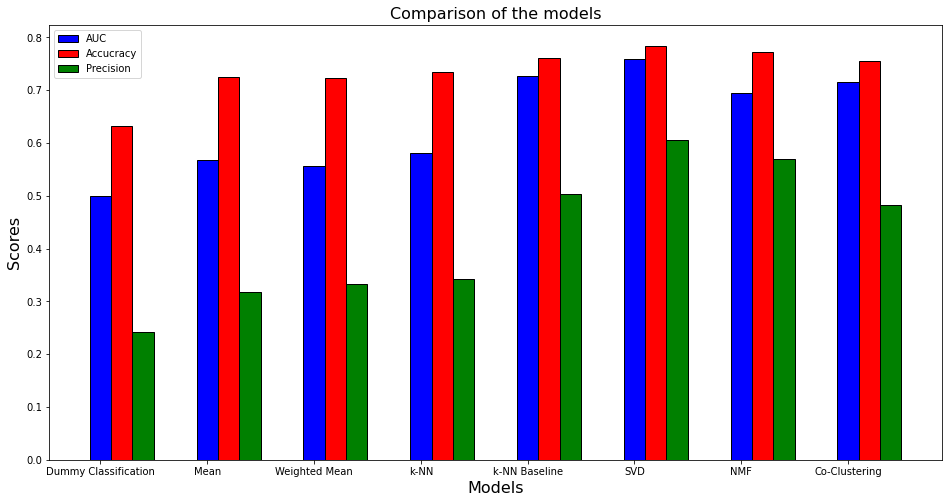

In [62]:
index1=[1,2,3,4,5,6,7,8]
index2=[1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2]
index3=[1.4,2.4,3.4,4.4,5.4,6.4,7.4,8.4]
plt.figure(figsize=(16,8))
plt.xlabel('Models',fontsize=16)
plt.ylabel ('Scores',fontsize=16)
plt.title('Comparison of the models',fontsize=16)
_=plt.bar(index1,score_auc,color='b',label='AUC',edgecolor='k',width=0.2)
_=plt.bar(index2,score_acc,color='r',label='Accucracy',edgecolor='k',width=0.2)
_=plt.bar(index3,score_pre,color='g',label='Precision',edgecolor='k',width=0.2)
plt.xticks([1,2,3,4,5,6,7,8], modelLabels)
plt.legend()
plt.savefig("ModelCompare.png")
plt.show()

So SVD excels at all metrics: AUC, accucracy and precision. We will use SVD for further tuning.

### Optimize SVD

In [63]:
from surprise.model_selection import KFold

In [64]:
def evaluation(actual_values, predicted_values, predicted_probabilities):
    fpr,tpr,threshold=roc_curve(actual_values, predicted_probabilities,pos_label=2)
    return auc(fpr,tpr),accuracy_score(actual_values,predicted_values),precision_score(actual_values,predicted_values, pos_label=2)

In [65]:
n_epochs= [10, 20]
lr_all= [0.002, 0.005]
reg_all=[0.02, 0.04]
kf = KFold(n_splits=3)
for i in n_epochs:
    for j in lr_all:
        for k in reg_all:
            algo = SVD(n_epochs=i,lr_all=j,reg_all=k)
            aveauc=[]
            aveacc=[]
            avepre=[]
            for trainset, testset in kf.split(data):
                algo.fit(trainset)
                predictions = algo.test(testset)
                y_test=[predictions[i].r_ui for i in range(len(predictions))]
                y_prob=[propa(predictions[i].est) for i in range(len(predictions))]
                y_pred=[classify(i,0.5) for i in y_prob]
                # Compute and print Root Mean Squared Error
                aucc,accc,prec=evaluation(y_test,y_pred,y_prob)
                aveauc.append(aucc)
                aveacc.append(accc)
                avepre.append(prec)
            print("For parameters: n_epochs= "+str(i)+"; lr_all= "+str(j)+";reg_all= "+str(k))
            print("Average AUC: "+str((sum(aveauc)/len(aveauc)))+"; Average Accuracy: "+str((sum(aveacc)/len(aveacc)))+"; Average Precision:"+str((sum(avepre)/len(avepre))))

For parameters: n_epochs= 10; lr_all= 0.002;reg_all= 0.02
Average AUC: 0.739086653630496; Average Accuracy: 0.7761312930621612; Average Precision:0.6451329563310862
For parameters: n_epochs= 10; lr_all= 0.002;reg_all= 0.04
Average AUC: 0.7432331523223326; Average Accuracy: 0.7765390943965252; Average Precision:0.6548979857286619
For parameters: n_epochs= 10; lr_all= 0.005;reg_all= 0.02
Average AUC: 0.755161096657785; Average Accuracy: 0.7811545203513415; Average Precision:0.626198084375085
For parameters: n_epochs= 10; lr_all= 0.005;reg_all= 0.04
Average AUC: 0.7598725751935088; Average Accuracy: 0.7824221818635889; Average Precision:0.6392840520914191
For parameters: n_epochs= 20; lr_all= 0.002;reg_all= 0.02
Average AUC: 0.7531142866727908; Average Accuracy: 0.7802377576616862; Average Precision:0.6332745349476107
For parameters: n_epochs= 20; lr_all= 0.002;reg_all= 0.04
Average AUC: 0.757668031723245; Average Accuracy: 0.7811734878552653; Average Precision:0.6440949108144487
For para

We will now use precision to determine the best model. This is because a user will not like it if a recommended book turns out bad, and precision captures this perfectly. With this we see that the best estimator is SVD with n_epochs = 10, lr_all= 0.002 and reg_all=0.04

In [67]:
from surprise import SVD
svdmodel = SVD(n_epochs=10,lr_all=0.002,reg_all=0.04)
svdmodel.fit(model_train)
predictions = svdmodel.test(model_test)
svdscore=accuracy.rmse(predictions)

RMSE: 0.3943


In [68]:
y_test=[predictions[i].r_ui for i in range(len(predictions))]
y_prob=[propa(predictions[i].est) for i in range(len(predictions))]
y_pred=[classify(i,0.5) for i in y_prob]

confusion matrix: 
 [[140326   4070]
 [ 37882   7521]]

accuracy:  0.7789661694740225

classification report: 
               precision    recall  f1-score   support

         1.0       0.79      0.97      0.87    144396
         2.0       0.65      0.17      0.26     45403

    accuracy                           0.78    189799
   macro avg       0.72      0.57      0.57    189799
weighted avg       0.75      0.78      0.72    189799


Area under ROC curve for validation set: 0.7434420610880713


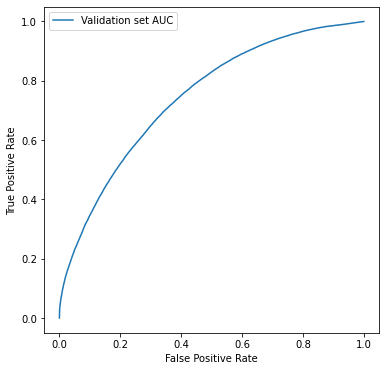

In [69]:
aucsvd, accsvd,presvd=model_evaluation(y_test,y_pred,y_prob)

In [70]:
userlistresult=[predictions[i].uid for i in range(len(predictions))]
booklistresult=[predictions[i].iid for i in range(len(predictions))]


In [71]:
booklisttitle=userbookrating[userbookrating['Book-ID'].isin(booklistresult)][['Book-ID','Book-Title']].drop_duplicates()

In [72]:
countbook=pd.DataFrame({'User-ID':userlistresult, 'Book-ID':booklistresult})

In [73]:
countbook=countbook.merge(booklisttitle,on='Book-ID', how='left')

In [74]:
countbook['Predict Recommended Book']=y_pred

In [75]:
countbook['Actual Recommended Book']=y_test

In [76]:
countbook.to_csv('final_result_recommendation.csv', index=False, header=True)

In [77]:
from surprise import __version__ as surprise_version

In [78]:
best_model = SVD(n_epochs=10,lr_all=0.002,reg_all=0.04)
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.surprise_version = surprise_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [80]:
from library.sb_utils import save_file
modelpath = 'models'
save_file(best_model, 'Book_Recommendation_System.pkl', modelpath)

Directory models was created.
Writing file.  "models\Book_Recommendation_System.pkl"


# Summary: 

We have created a recommendation system to predict whether a reader will like a book in this project. Because of the polarization of the ratings, we label the books that readers dislike as one and the books they like as two. We then set up a collaborative filtering system based on users' ratings. We also use the surprise scikit and its models. The following algorithms were considered: 'Dummy Classification,' 'Mean,' 'Weighted Mean,' 'k-NN,' 'k-NN Baseline,' 'SVD,' 'NMF,' 'Co-Clustering.' We then test these models with three metrics: ROC-AUC, accuracy, and precision. Based on all three metrics, the best model is 'SVD.' This is a famous model popularized by Simon Funk during the Netflix Contest. We then proceed to optimize the SVD model. The optimized model gives a ROC_AUC of 0.74, an accuracy of 0.78, and a precision of 0.64.

# Future Directions:

Obtains more features to use content-based recommendation.

Combining content-based and collaborative-filtering to create hybrid system.

Develop a collaborative-filtering system based on items.